In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


class StockTicker:
    """
    This class represents a stock ticker and provides methods to retrieve and save ticker information and historical market data.
    """
    def __init__(self, ticker_symbols):
        """
        Initializes a StockTicker object with the given ticker symbols.
        
        Parameters:
        ticker_symbols (list of str): The symbols of the stocks for which to retrieve data.
        """
        self.ticker_symbols = ticker_symbols

    def get_ticker_data(self):
        """
        Retrieves and saves the ticker information and historical market data of the stocks.
        
        Parameters:
        None

        Returns:
        None
        """
        for ticker_symbol in self.ticker_symbols:
            # Create a Ticker object for the given stock symbol
            ticker = yf.Ticker(ticker_symbol)
            # Get the ticker information and convert it to a pandas DataFrame
            ticker_info_df = pd.DataFrame(ticker.info)
            # Save the ticker information to a CSV file
            ticker_info_df.to_csv(f"{ticker_symbol}_info.csv")
            # Get the historical market data for the given stock
            hist = ticker.history(period="max")
            # Filter the data to include only dates after 2010
            hist = hist.loc[hist.index >= "2010-01-01"]
            # Calculate the differences
            hist["High-Low"] = hist["High"].round(6) - hist["Low"].round(6)
            hist["Open-Close"] = hist["Open"].round(6) - hist["Close"].round(6)
            # Save the historical market data to a CSV file
            hist.to_csv(f"{ticker_symbol}_hist.csv")

    def plot_stock(self, ticker_symbol, columns=["Open", "Close", "Low", "High"], period="daily"):
        """
        Plots the selected columns of the specified stock's historical market data for the specified period.
        
        Parameters:
        ticker_symbol (str): The symbol of the stock for which to plot the data.
        columns (list of str): The columns to plot. Defaults to ["Open", "Close", "Low", "High"].
        period (str): The period for which to plot the data. Can be "daily", "weekly", or "yearly". Defaults to "daily".

        Returns:
        None
        """
        # Read the historical market data from the CSV file
        hist_df = pd.read_csv(f"{ticker_symbol}_hist.csv", index_col="Date")
        # Convert the index to a DatetimeIndex
        hist_df.index = pd.to_datetime(hist_df.index)
        # Resample the data based on the specified period
        if period == "weekly":
            hist_df = hist_df.resample("W").mean()
        elif period == "yearly":
            hist_df = hist_df.resample("Y").mean()
        # Plot the selected columns
        hist_df[columns].plot(figsize=(12, 8), title=ticker_symbol)
        # Show the plot
        plt.show()

# Usage example
stock_ticker = StockTicker(["AAPL", "GOOGL", "MSFT"])
stock_ticker.get_ticker_data()


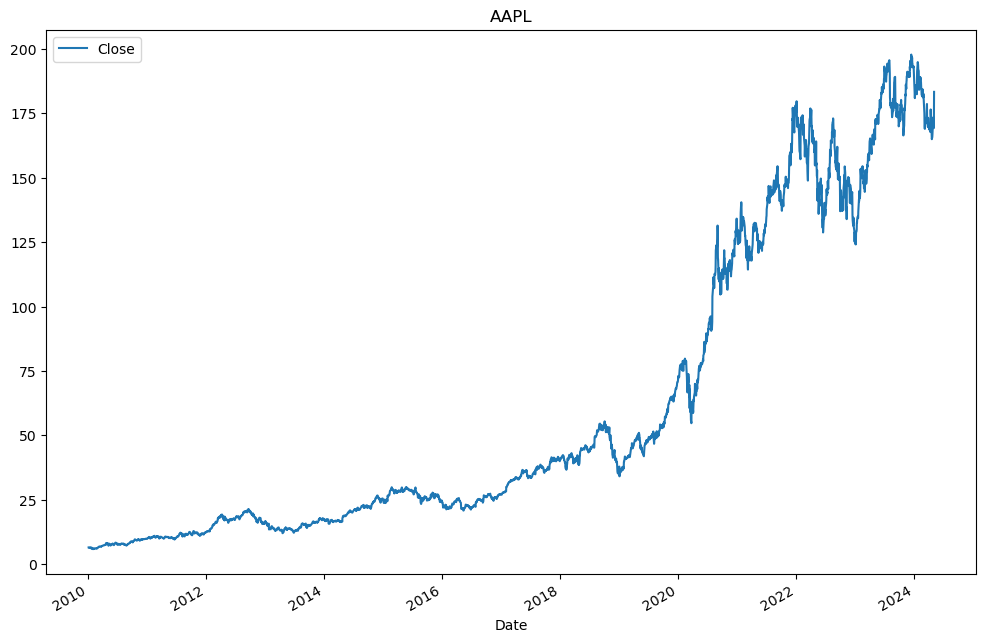

In [31]:
stock_ticker.plot_stock("AAPL", ["Close"])

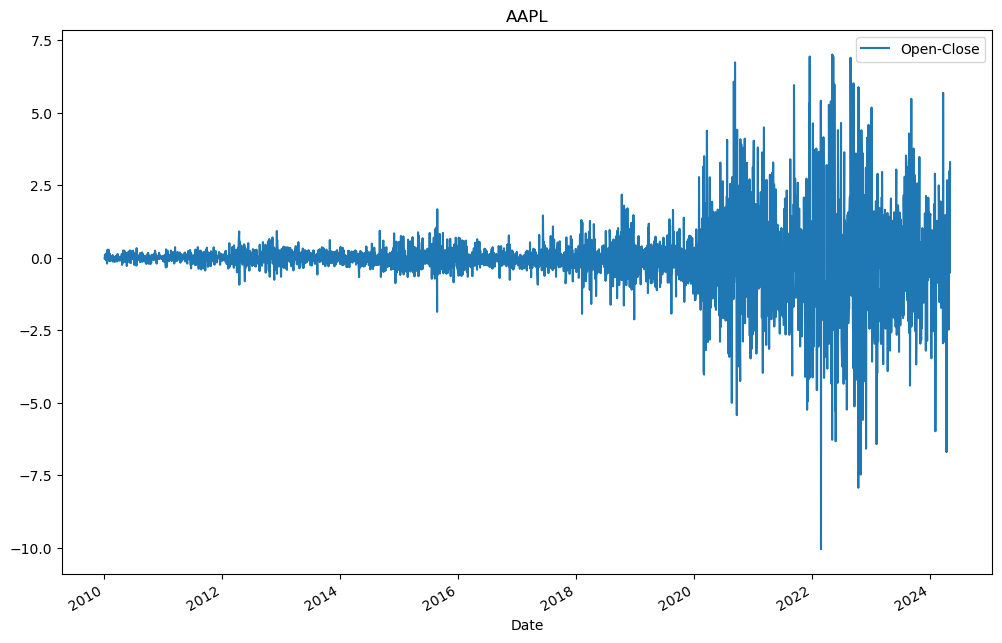

In [32]:
stock_ticker.plot_stock("AAPL", ["Open-Close"])